In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [8]:
import numpy as np
import pandas as pd
import math
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='dark')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, f1_score,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
raw_data = pd.read_csv('cleaned_data.csv')
raw_data.describe()

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
count,1.339066e+06,1.339066e+06,1.339066e+06,1.339066e+06,1.339066e+06,1.339066e+06,1.339066e+06,1.339066e+06,1.339066e+06,1.339066e+06,1.339066e+06,1.339066e+06
mean,2.365601e+01,1.931241e+03,9.431297e+00,1.929421e+03,6.431404e+02,1.151792e+01,2.005642e+03,2.028673e+02,6.920642e+01,3.045286e+01,7.236304e+00,2.109791e-01
std,1.707686e+00,2.694606e+03,1.191543e+01,2.746410e+03,9.154699e+02,1.346662e+01,1.018332e+04,7.488265e+02,1.690032e+02,2.219913e+01,1.034500e+01,4.080038e-01
min,4.500000e+00,4.270000e+00,1.000000e+00,4.300000e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.400000e+01,4.273500e+02,2.000000e+00,3.615400e+02,1.205100e+02,2.000000e+00,4.900000e+01,5.000000e+00,9.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,2.400000e+01,1.068380e+03,5.000000e+00,1.061540e+03,3.538500e+02,7.000000e+00,2.770000e+02,2.000000e+01,2.500000e+01,2.900000e+01,4.000000e+00,0.000000e+00
75%,2.400000e+01,2.307690e+03,1.100000e+01,2.350000e+03,7.833300e+02,1.500000e+01,6.240000e+02,7.500000e+01,5.100000e+01,5.300000e+01,7.000000e+00,0.000000e+00
max,2.400000e+01,1.241453e+05,1.330000e+02,1.136966e+05,3.789872e+04,9.100000e+01,1.823866e+06,5.080900e+04,1.204000e+04,6.200000e+01,6.290000e+02,1.000000e+00


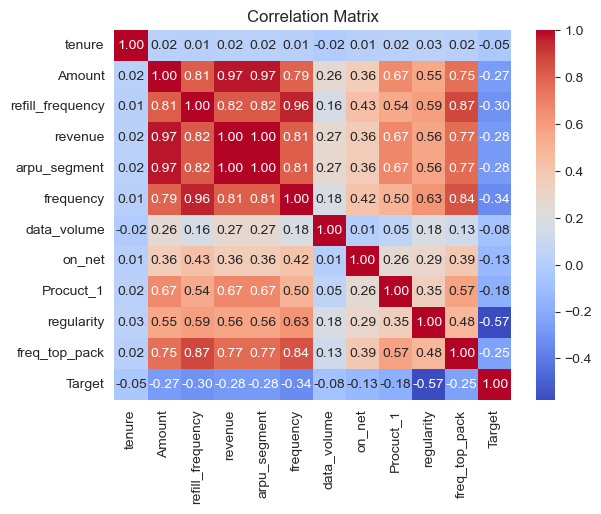

In [26]:
correlation_matrix = raw_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [3]:
test_data = pd.read_csv('Test.csv')
test_data.describe()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack
count,247072.000000,247072.000000,252754.00000,252754.000000,252754.000000,193087.000000,241613.000000,222897.000000,153126.000000,29861.000000,24076.000000,380127.000000,221348.000000
mean,2361.094384,11.519853,2350.29115,783.433060,13.957963,3346.095454,278.806310,95.193008,23.052088,8.164663,7.655300,28.081699,9.261584
std,3041.162190,13.242743,3074.82589,1024.940158,14.652660,12002.653047,874.253933,203.950776,65.042688,48.857605,33.021478,22.289094,12.268907
min,10.680000,1.000000,0.43000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,427.350000,2.000000,427.35000,142.310000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000
50%,1282.050000,7.000000,1282.05000,427.350000,9.000000,259.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000
75%,3141.030000,16.000000,3141.45000,1047.010000,19.000000,2884.000000,157.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000
max,86111.110000,146.000000,85882.48000,28627.350000,91.000000,977796.000000,26786.000000,6345.000000,3708.000000,4215.000000,1649.000000,62.000000,390.000000


In [28]:
test_data

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack
0,ID_LZ8K373W7EWV,Droidika,K > 24 month,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,NaN,NaN,NO,59,On net 200F=Unlimited _call24H,11.0
1,ID_04KNWHGV5783,Luminous,K > 24 month,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,84.0,NaN,NaN,NO,49,All-net 500F=2000F;5d,12.0
2,ID_CXS07G6VLB2U,Astral,K > 24 month,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,NaN,NaN,NO,13,Jokko_Daily,6.0
3,ID_N3NFJJVHS25K,Eclipsara,K > 24 month,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,NaN,NaN,NaN,NO,53,All-net 500F=2000F;5d,13.0
4,ID_R36J4ROT93E9,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380122,ID_MGZSA4ICBD9O,Stellaris,K > 24 month,4273.50,19.0,4487.18,1495.73,20.0,NaN,60.0,208.0,80.0,NaN,NaN,NO,54,All-net 500F=2000F;5d,20.0
380123,ID_XGDT520DFBLP,NaN,K > 24 month,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,NaN,NaN,NO,59,"Data: 200 F=100MB,24H",33.0
380124,ID_9RDB792PB5Q4,Mandalore,K > 24 month,NaN,NaN,42.31,14.10,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NO,43,NaN,NaN
380125,ID_KDTJHH8L8Z13,Luminous,K > 24 month,2307.69,9.0,2264.53,754.70,13.0,7381.0,15.0,NaN,19.0,2.0,NaN,NO,61,"Data:490F=1GB,7d",5.0


In [29]:
test_data.isnull().sum()

ID                       0
region              149728
tenure                   0
Amount              133055
refill_frequency    133055
revenue             127373
arpu_segment        127373
frequency           127373
data_volume         187040
on_net              138514
Procuct_1           157230
Procuct_2           227001
zone1               350266
zone2               356051
mrg                      0
regularity               0
top_pack            158779
freq_top_pack       158779
dtype: int64

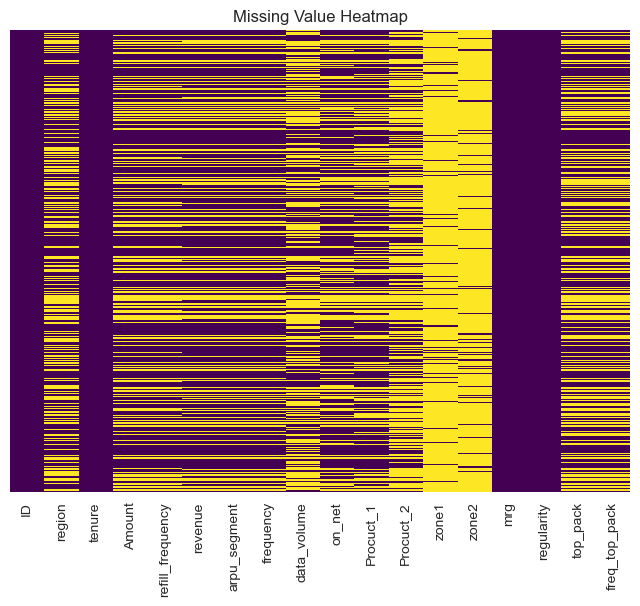

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(test_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

### Similar treatment to fillna() of the train data will be applied to test data


## First we need to Preprocess our data

### First preprocessing is filtering out outliers

In [4]:
train_df = raw_data.copy().drop(columns=['refill_frequency','revenue','arpu_segment'])
train_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
0,24.0,4764.96,41.0,2.0,626.0,24.0,62,31.0,0
1,24.0,5769.23,22.0,28121.0,0.0,31.0,61,5.0,0
2,24.0,5341.88,60.0,1131.0,546.0,376.0,62,31.0,0
3,24.0,42.74,2.0,4.0,3.0,31.0,44,5.0,0
4,24.0,2564.10,13.0,277.0,96.0,96.0,59,13.0,0
...,...,...,...,...,...,...,...,...,...
1339061,24.0,7179.49,18.0,4269.0,7.0,31.0,41,4.0,0
1339062,24.0,854.70,2.0,2276.0,0.0,31.0,36,2.0,0
1339063,24.0,1923.08,10.0,277.0,34.0,74.0,40,10.0,0
1339064,24.0,1388.89,9.0,0.0,30.0,31.0,39,5.0,0


In [ ]:
X = train_df.drop('Target', axis=1)
y = train_df['Target']

In [6]:
from scipy.stats import zscore

z_scores = zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

X_filtered = X[filtered_entries]
y_filtered = y[filtered_entries].reset_index(drop=True)


### The we want to scaled our features

In [14]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_filtered),columns=X.columns)
X_scaled

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
0,0.159214,2.001756,3.267727,-0.386554,1.856440,-0.305911,1.537881,4.267194
1,0.159214,2.617630,1.302798,7.504019,-0.387692,-0.217542,1.491627,-0.097690
2,0.159214,-0.894174,-0.765548,-0.385993,-0.376937,-0.217542,0.705322,-0.097690
3,0.159214,0.652065,0.372042,-0.309386,-0.043544,0.603029,1.399121,1.245351
4,0.159214,-0.658310,-0.765548,-0.364666,-0.369767,-0.495273,-1.283569,-0.601331
...,...,...,...,...,...,...,...,...
1227432,0.159214,3.482481,0.889128,0.810824,-0.362597,-0.217542,0.566562,-0.265570
1227433,0.159214,-0.396235,-0.765548,0.251561,-0.387692,-0.217542,0.335295,-0.601331
1227434,0.159214,0.258956,0.061790,-0.309386,-0.265806,0.325298,0.520308,0.741711
1227435,0.159214,-0.068640,-0.041627,-0.387116,-0.280145,-0.217542,0.474055,-0.097690


In [19]:
# Just to make sure that we have not lost too much of our target variable
y_filtered.value_counts()

0    955974
1    271463
Name: Target, dtype: int64

### We need to do some balancing of the target classes


In [20]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled  = rus.fit_resample(X_scaled,y_filtered)

In [21]:
y_resampled.value_counts()

0    271463
1    271463
Name: Target, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=0)

In [70]:
print(X_train, X_test, y_train, y_test)

          tenure    Amount  frequency  data_volume    on_net  Procuct_1  \
315056  0.159214 -0.658310  -0.765548    -0.364666 -0.369767  -0.495273   
268029  0.159214  2.041065   2.130136    -0.386554  3.068127  -0.154421   
150754  0.159214 -0.134160  -0.662131     0.241178 -0.280145  -0.217542   
240035  0.159214  0.023085   0.372042    -0.100048 -0.280145  -0.204917   
269179  0.159214  0.389990   0.372042     3.172187  5.115090  -0.230166   
...          ...       ...        ...          ...       ...        ...   
359783  0.159214 -0.658310  -0.765548    -0.364666 -0.369767  -0.495273   
152315  0.159214 -0.527269  -0.558714    -0.309386  1.512292  -0.002931   
117952  0.159214 -0.265194  -0.455297    -0.309386 -0.179769  -0.066052   
435829  0.159214 -0.658310  -0.765548    -0.364666 -0.369767  -0.495273   
305711  0.159214 -0.658310  -0.765548    -0.364666 -0.369767  -0.495273   

        regularity  freq_top_pack  
315056   -1.283569      -0.601331  
268029    1.029094       1.

In [112]:
model_lreg = LogisticRegression()
model_lreg.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_pred = model_lreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.875849557033135
Confusion Matrix:
[[44761  9444]
 [ 4037 50344]]
___________________________
F1 Score: 0.8819206614755318


In [113]:
# Access coefficients and intercept
coefficients = model_lreg.coef_
intercept = model_lreg.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-6.18183461e-02  5.63510426e-01 -1.05187325e+00  4.27665636e-01
  -2.21187054e-03 -2.00038876e+00 -2.40318843e+00 -1.46341545e+00]]
Intercept: [-3.09746974]


In [76]:
import statsmodels.api as sm

# Add a constant term to the features for statsmodels
X_train_with_const = sm.add_constant(X_train)

# Fit the logistic regression model
model_stats = sm.Logit(y_train, X_train_with_const).fit()

# Print the summary
print(model_stats.summary())


Optimization terminated successfully.
         Current function value: 0.334529
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:               434340
Model:                          Logit   Df Residuals:                   434331
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 Nov 2023   Pseudo R-squ.:                  0.5174
Time:                        16:36:18   Log-Likelihood:            -1.4530e+05
converged:                       True   LL-Null:                   -3.0106e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.0982      0.015   -200.324      0.000      -3.129      -3.068
tenure           -0.

In [115]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.9707420846149596
Confusion Matrix:
[[53545   660]
 [ 2517 51864]]
___________________________
F1 Score: 0.9702820260979376


Feature ranking:
frequency: 0.23392852466680178
Procuct_1: 0.20713945845708576
regularity: 0.1389126875494627
data_volume: 0.10789850130211444
freq_top_pack: 0.1062390961090753
Amount: 0.10221659973346693
on_net: 0.10099035195154517
tenure: 0.0026747802304479956


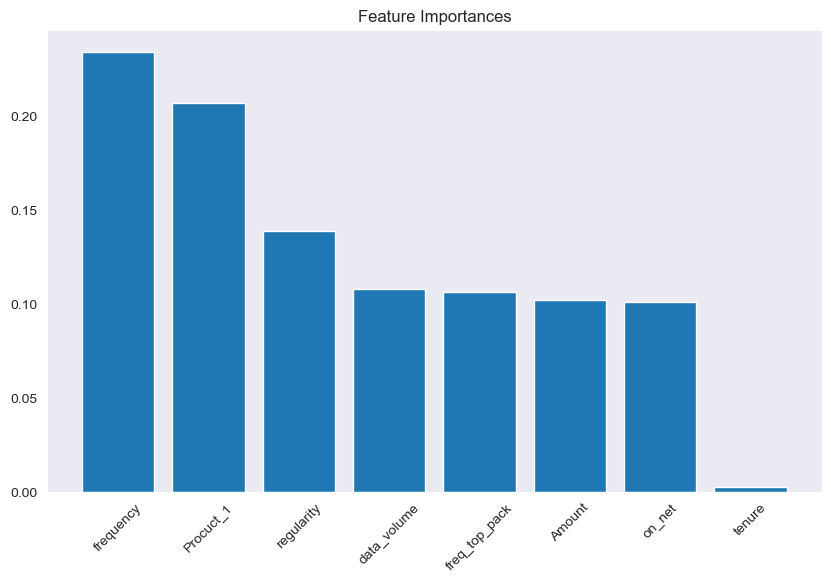

In [84]:
# Access feature importances
importances = model_rf.feature_importances_

# Get the indices that would sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()

In [116]:
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    eval_metric='logloss',        # use logloss as the evaluation metric
    random_state=0
)

model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)


In [117]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.971745897261157
Confusion Matrix:
[[53461   744]
 [ 2324 52057]]
___________________________
F1 Score: 0.9713757907111269


Feature ranking:
frequency: 0.5664726495742798
Procuct_1: 0.16385726630687714
regularity: 0.08606196194887161
data_volume: 0.05351871997117996
freq_top_pack: 0.06410125643014908
Amount: 0.004826430231332779
on_net: 0.05089134722948074
tenure: 0.010270359925925732


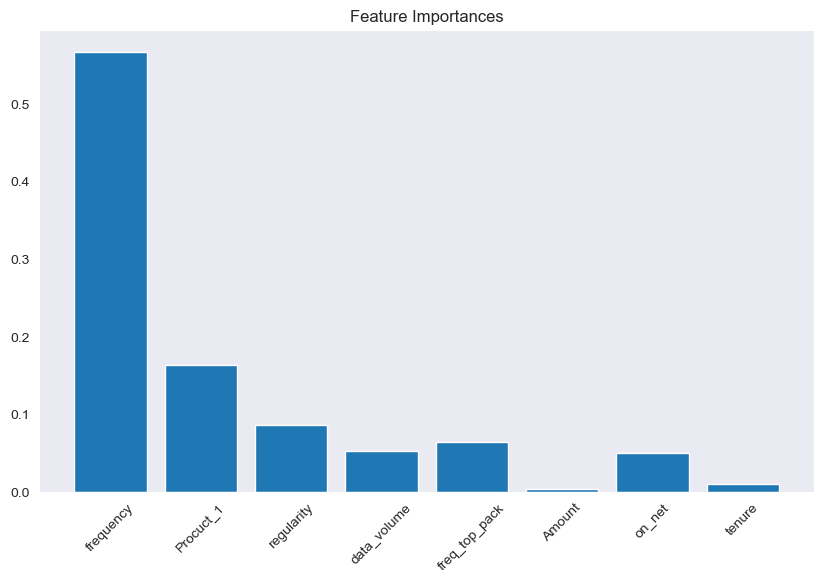

In [87]:
importances = model.feature_importances_
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()

In [107]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10,8,5),activation='tanh',solver='adam', max_iter=250, random_state=0)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 8, 5), max_iter=250,
              random_state=0)

In [108]:
# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy:", accuracy_mlp)

conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("MLP Confusion Matrix:")
print(conf_matrix_mlp)

f1_mlp = f1_score(y_test, y_pred_mlp)
print("MLP F1 Score:", f1_mlp)

MLP Accuracy: 0.9590094487318808
MLP Confusion Matrix:
[[53376   829]
 [ 3622 50759]]
MLP F1 Score: 0.9579971501099379


In [118]:
model_ann = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  # for binary classification
])

# Compile the model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [119]:
# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_test, y_test))


Epoch 1/10
8687/8687 [==============================] - 19s 2ms/step - loss: 0.1624 - accuracy: 0.9381 - val_loss: 0.1485 - val_accuracy: 0.9424
Epoch 2/10
8687/8687 [==============================] - 19s 2ms/step - loss: 0.1359 - accuracy: 0.9476 - val_loss: 0.1289 - val_accuracy: 0.9502
Epoch 3/10
8687/8687 [==============================] - 19s 2ms/step - loss: 0.1277 - accuracy: 0.9508 - val_loss: 0.1242 - val_accuracy: 0.9518
Epoch 4/10
8687/8687 [==============================] - 18s 2ms/step - loss: 0.1234 - accuracy: 0.9525 - val_loss: 0.1222 - val_accuracy: 0.9527
Epoch 5/10
8687/8687 [==============================] - 19s 2ms/step - loss: 0.1210 - accuracy: 0.9530 - val_loss: 0.1296 - val_accuracy: 0.9474
Epoch 6/10
8687/8687 [==============================] - 18s 2ms/step - loss: 0.1186 - accuracy: 0.9539 - val_loss: 0.1181 - val_accuracy: 0.9541
Epoch 7/10
8687/8687 [==============================] - 17s 2ms/step - loss: 0.1160 - accuracy: 0.9550 - val_loss: 0.1161 - val_ac

In [111]:
# Evaluate the model on the test set
y_pred_ann = (model.predict(X_test) > 0.5).astype(int).flatten()

# Evaluate the ANN model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)

conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print("ANN Confusion Matrix:")
print(conf_matrix_ann)

f1_ann = f1_score(y_test, y_pred_ann)
print("ANN F1 Score:", f1_ann)

3394/3394 [==============================] - 5s 1ms/step
ANN Accuracy: 0.9595251689904776
ANN Confusion Matrix:
[[53407   798]
 [ 3597 50784]]
ANN F1 Score: 0.9585232581183998


In [123]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained XGBoost, RandomForest, and ANN models
# Evaluate the models on the test set
y_pred_lreg = model_lreg.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_prob_ann = model_ann.predict(X_test)

# Calculate precision, recall, F1 score, and AUC-ROC for each model
precision_lreg = precision_score(y_test, y_pred_lreg)
recall_lreg = recall_score(y_test, y_pred_lreg)
f1_lreg = f1_score(y_test, y_pred_lreg)
auc_roc_lreg = roc_auc_score(y_test, model_lreg.predict_proba(X_test)[:, 1])

precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_roc_xgb = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])

precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
auc_roc_ann = roc_auc_score(y_test, y_pred_prob_ann)

# Print the results
print("Logistic Regression Metrics:")
print(f"Precision: {precision_lreg:.4f}")
print(f"Recall: {recall_lreg:.4f}")
print(f"F1 Score: {f1_lreg:.4f}")
print(f"AUC-ROC: {auc_roc_lreg:.4f}\n")
print('________________________________________________________')

print("XGBoost Metrics:")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"AUC-ROC: {auc_roc_xgb:.4f}\n")
print('________________________________________________________')

print("RandomForest Metrics:")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"AUC-ROC: {auc_roc_rf:.4f}\n")
print('________________________________________________________')

print("ANN Metrics:")
print(f"Precision: {precision_ann:.4f}")
print(f"Recall: {recall_ann:.4f}")
print(f"F1 Score: {f1_ann:.4f}")
print(f"AUC-ROC: {auc_roc_ann:.4f}")
print('________________________________________________________')

3394/3394 [==============================] - 5s 1ms/step
Logistic Regression Metrics:
Precision: 0.8420
Recall: 0.9258
F1 Score: 0.8819
AUC-ROC: 0.9517

________________________________________________________
XGBoost Metrics:
Precision: 0.9859
Recall: 0.9573
F1 Score: 0.9714
AUC-ROC: 0.9956

________________________________________________________
RandomForest Metrics:
Precision: 0.9874
Recall: 0.9537
F1 Score: 0.9703
AUC-ROC: 0.9943

________________________________________________________
ANN Metrics:
Precision: 0.9742
Recall: 0.9458
F1 Score: 0.9597
AUC-ROC: 0.9921
________________________________________________________


In [124]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    # Add other hyperparameters as needed
}

# Hyperparameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # Add other hyperparameters as needed
}

# Create GridSearchCV instances
grid_search_xgb = GridSearchCV(
    xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42),
    param_grid_xgb,
    scoring='accuracy',  # Choose the scoring metric, e.g., 'f1', 'roc_auc', etc.
    cv=5  # Number of cross-validation folds
)

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=46),
    param_grid_rf,
    scoring='accuracy',  # Choose the scoring metric, e.g., 'f1', 'roc_auc', etc.
    cv=5  # Number of cross-validation folds
)

# Fit the models
grid_search_xgb.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters for each model
best_params_xgb = grid_search_xgb.best_params_
best_params_rf = grid_search_rf.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for XGBoost:", best_params_xgb)
print("Best Hyperparameters for RandomForest:", best_params_rf)

# Get the best models
best_model_xgb = grid_search_xgb.best_estimator_
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best models on the test set
y_pred_best_xgb = best_model_xgb.predict(X_test)
y_pred_best_rf = best_model_rf.predict(X_test)

# Calculate metrics for the best models
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

print("Best XGBoost Accuracy:", accuracy_best_xgb)
print("Best RandomForest Accuracy:", accuracy_best_rf)


Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Hyperparameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best XGBoost Accuracy: 0.9722800361004181
Best RandomForest Accuracy: 0.971101246937911


In [126]:
test_data.isnull().sum()

ID                       0
region              149728
tenure                   0
Amount              133055
refill_frequency    133055
revenue             127373
arpu_segment        127373
frequency           127373
data_volume         187040
on_net              138514
Procuct_1           157230
Procuct_2           227001
zone1               350266
zone2               356051
mrg                      0
regularity               0
top_pack            158779
freq_top_pack       158779
dtype: int64

In [6]:
test_data.groupby('region').count()

,ID,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack
region,,,,,,,,,,,,,,,,,
Astral,6360,6360,5205,5205,5291,5291,5291,3705,5352,4760,3403,519,362,6360,6360,4813,4813
Celestial,17405,17405,14307,14307,14481,14481,14481,10205,14666,13082,9266,1744,510,17405,17405,13381,13381
Droidika,31743,31743,26519,26519,26882,26882,26882,19548,25914,24130,20241,2893,1369,31743,31743,24338,24338
Eclipsara,21369,21369,18623,18623,18802,18802,18802,12711,18570,17220,10083,1901,1858,21369,21369,17296,17296
Eternum,190,190,146,146,153,153,153,93,146,141,73,14,17,190,190,137,137
Forcehaven,543,543,433,433,443,443,443,313,384,413,207,66,41,543,543,404,404
Luminous,11692,11692,8556,8556,8700,8700,8700,7630,8188,6727,6637,742,319,11692,11692,7605,7605
Mandalore,90615,90615,77622,77622,78814,78814,78814,59545,73520,73294,55562,10737,9783,90615,90615,70660,70660
Nebula,9819,9819,8427,8427,8531,8531,8531,5816,8500,7925,3096,1386,1003,9819,9819,7781,7781


In [11]:
test_data.groupby(['regularity','tenure']).median().reset_index()

,regularity,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,freq_top_pack
0,1,D 3-6 month,NaN,NaN,85.470,28.630,1.0,11.0,2.0,5.0,NaN,NaN,NaN,1.0
1,1,E 6-9 month,213.680,1.0,213.680,71.370,1.0,715.0,3.0,5.0,NaN,NaN,NaN,1.0
2,1,F 9-12 month,213.680,1.0,209.830,70.090,1.0,420.5,5.0,1.0,4.0,0.0,1.0,1.0
3,1,G 12-15 month,213.680,1.0,88.465,29.490,1.0,256.0,1.0,8.0,3.0,NaN,0.0,1.0
4,1,H 15-18 month,213.680,1.0,85.470,28.630,1.0,1.0,4.0,4.0,2.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,62,G 12-15 month,4391.025,21.5,4402.140,1467.520,27.0,6595.0,81.0,63.0,9.0,1.0,2.0,13.0
472,62,H 15-18 month,4059.830,23.0,4102.560,1367.520,29.0,3177.0,232.5,54.0,8.5,1.0,2.0,14.0
473,62,I 18-21 month,4487.180,23.0,4645.730,1548.720,31.0,4562.0,169.0,69.0,11.0,1.0,3.5,15.0
474,62,J 21-24 month,4743.590,23.0,4844.230,1614.745,30.0,3818.0,165.0,62.0,15.0,2.0,2.0,14.0


In [9]:
test_data.groupby(['Procuct_1','frequency']).median().reset_index()

,Procuct_1,frequency,Amount,refill_frequency,revenue,arpu_segment,data_volume,on_net,Procuct_2,zone1,zone2,regularity,freq_top_pack
0,0.0,1.0,170.94,1.0,35.470,11.970,1.0,3.0,2.0,1.0,1.0,10.0,1.0
1,0.0,2.0,213.68,1.0,179.490,59.830,192.0,2.0,1.0,0.0,1.0,15.0,1.0
2,0.0,3.0,299.15,2.0,256.410,85.470,406.0,3.0,1.0,1.0,1.0,19.0,1.0
3,0.0,4.0,427.35,3.0,427.780,142.740,1023.0,2.0,1.0,1.0,1.0,26.0,2.0
4,0.0,5.0,641.03,3.0,634.615,211.535,1258.5,3.0,1.0,1.0,0.0,31.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29982,5520.0,90.0,29102.56,97.0,30170.940,10056.840,22497.0,338.0,445.0,NaN,NaN,62.0,133.0
29983,5695.0,85.0,32564.10,82.0,33267.090,11088.890,15113.0,334.0,784.0,0.0,5.0,62.0,147.0
29984,5774.0,8.0,49145.30,6.0,49145.300,16381.620,28.0,NaN,NaN,NaN,NaN,45.0,11.0
29985,6005.0,90.0,41367.52,120.0,42435.470,14145.300,NaN,2482.0,1489.0,NaN,NaN,62.0,172.0


In [10]:
test_data.groupby('Procuct_1').median().reset_index()

,Procuct_1,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_2,zone1,zone2,regularity,freq_top_pack
0,0.0,598.29,3.0,466.24,155.56,5.0,1331.0,3.0,1.0,1.0,1.0,29.0,3.0
1,1.0,427.35,3.0,362.82,120.94,4.0,524.0,4.0,1.0,1.0,1.0,26.0,3.0
2,2.0,427.35,3.0,427.35,142.31,5.0,534.5,5.0,2.0,1.0,1.0,27.0,3.0
3,3.0,512.82,3.0,490.17,163.25,5.0,537.0,6.0,2.0,1.0,1.0,29.0,2.0
4,4.0,512.82,3.0,467.09,155.56,5.0,395.5,8.0,2.0,1.0,1.0,28.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,5520.0,29102.56,97.0,30170.94,10056.84,90.0,22497.0,338.0,445.0,NaN,NaN,62.0,133.0
2049,5695.0,32564.10,82.0,33267.09,11088.89,85.0,15113.0,334.0,784.0,0.0,5.0,62.0,147.0
2050,5774.0,49145.30,6.0,49145.30,16381.62,8.0,28.0,NaN,NaN,NaN,NaN,45.0,11.0
2051,6005.0,41367.52,120.0,42435.47,14145.30,90.0,NaN,2482.0,1489.0,NaN,NaN,62.0,172.0


##### To fill the missing values in the train data the following process was used:
$$ fill_ median0 = df[df['Target'] == 0].groupby('tenure') $$
$$ df[df['Target'] == 0] = df[df['Target'] == 0].fillna(fill_ median0.transform('median')) $$

$$ fill_ median0 = df[df['Target'] == 0].groupby('tenure') $$ 
$$ df[df['Target'] == 0] = df[df['Target'] == 0].fillna(fill_ median0.transform('median')) $$ 
##### Give that This is the first iteratin of our model, I will impliment a similar cleaning process to the test data

##### Secondly I was also do a second version of the cleaning of the test data using the above groupby clause
##### Logic behind it is as such:
- The top 3 most important features are Procuct_1, frequency & Regularity. To ensure that the essence of the test data is captured I will
1. Fill in the missing values using median values for the non-null feature variable's median values by order of importance
2. Fill in missing values by regularity & tenure.

- I will then apply the same scaling to the features with 1 important tweak, instead of filtering the outliers, I will cap them to the 99-percentile

- In the second iteration of building the model I will then use more advance cleaning techniques for the training data with purpose of:
1. Introducing more feature into my RF & XGB models to handle more complexity
2. Use oversampling techniques instead of undersampling
3. Measure accuracy fall off & feature importance changes that might lead to a 3rd iteration of the data manipulation process

In [23]:
X_train

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
315056,0.159214,-0.658310,-0.765548,-0.364666,-0.369767,-0.495273,-1.283569,-0.601331
268029,0.159214,2.041065,2.130136,-0.386554,3.068127,-0.154421,1.029094,1.245351
150754,0.159214,-0.134160,-0.662131,0.241178,-0.280145,-0.217542,1.537881,-0.433450
240035,0.159214,0.023085,0.372042,-0.100048,-0.280145,-0.204917,0.150282,-0.769211
269179,0.159214,0.389990,0.372042,3.172187,5.115090,-0.230166,1.537881,-0.265570
...,...,...,...,...,...,...,...,...
359783,0.159214,-0.658310,-0.765548,-0.364666,-0.369767,-0.495273,-1.006050,-0.601331
152315,0.159214,-0.527269,-0.558714,-0.309386,1.512292,-0.002931,-0.265997,-0.601331
117952,0.159214,-0.265194,-0.455297,-0.309386,-0.179769,-0.066052,0.751575,-0.097690
435829,0.159214,-0.658310,-0.765548,-0.364666,-0.369767,-0.495273,-1.283569,-0.601331


In [29]:
test_data.set_index("ID", inplace=True)
test_data

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack
ID,,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,Droidika,K > 24 month,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,NaN,NaN,NO,59,On net 200F=Unlimited _call24H,11.0
ID_04KNWHGV5783,Luminous,K > 24 month,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,84.0,NaN,NaN,NO,49,All-net 500F=2000F;5d,12.0
ID_CXS07G6VLB2U,Astral,K > 24 month,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,NaN,NaN,NO,13,Jokko_Daily,6.0
ID_N3NFJJVHS25K,Eclipsara,K > 24 month,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,NaN,NaN,NaN,NO,53,All-net 500F=2000F;5d,13.0
ID_R36J4ROT93E9,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,Stellaris,K > 24 month,4273.50,19.0,4487.18,1495.73,20.0,NaN,60.0,208.0,80.0,NaN,NaN,NO,54,All-net 500F=2000F;5d,20.0
ID_XGDT520DFBLP,NaN,K > 24 month,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,NaN,NaN,NO,59,"Data: 200 F=100MB,24H",33.0
ID_9RDB792PB5Q4,Mandalore,K > 24 month,NaN,NaN,42.31,14.10,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NO,43,NaN,NaN


In [36]:
test_df = test_data.iloc[:,1:19].copy().drop(columns=['refill_frequency','revenue','arpu_segment','mrg','Procuct_2', 'zone1', 'zone2','top_pack'])
#test_df = raw_data.iloc[:,2:19].copy().drop(columns =['top_pack','mrg'])
tenuremap = {
    'K > 24 month': 24,
    'I 18-21 month': (18 + 21) / 2,
    'H 15-18 month': (15 + 18) / 2,
    'G 12-15 month': (12 + 15) / 2,
    'J 21-24 month': (21 + 24) / 2,
    'F 9-12 month': (9 + 12) / 2,
    'E 6-9 month': (6 + 9) / 2,
    'D 3-6 month': (3 + 6) / 2,
}
test_df['tenure'] = test_df['tenure'].map(tenuremap)
test_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,NaN,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,NaN,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,NaN,1.0,0.0,1.0,1.0,43,NaN


### Data cleaning

In [37]:
fill_median1 = test_df.groupby('tenure')
test_df = test_df.fillna(fill_median1.transform('median'))
test_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,255.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,1282.05,9.0,255.0,27.0,29.0,1,5.0
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,255.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,1282.05,1.0,0.0,1.0,1.0,43,5.0


### Test data preprocessing

In [41]:
scaler = StandardScaler()
test_scaled = pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns,index=test_df.index)
test_scaled

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,0.204069,0.010713,0.386896,-0.209175,0.084923,-0.317092,1.387151,0.368652
ID_04KNWHGV5783,0.204069,0.402967,0.386896,-0.180989,-0.124269,0.202968,0.938501,0.472797
ID_CXS07G6VLB2U,0.204069,-0.159833,-0.352137,-0.160166,-0.197768,0.284423,-0.676641,-0.152074
ID_N3NFJJVHS25K,0.204069,0.232421,0.058437,-0.210326,-0.073384,0.710496,1.117961,0.576942
ID_R36J4ROT93E9,0.204069,-0.279217,-0.270022,-0.180989,-0.226037,-0.241902,-1.215022,-0.256219
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,0.204069,0.914604,0.633240,-0.180989,-0.179393,0.879672,1.162826,1.305958
ID_XGDT520DFBLP,0.204069,1.963465,2.357649,0.597167,-0.115788,1.186695,1.387151,2.659844
ID_9RDB792PB5Q4,0.204069,-0.279217,-0.926940,-0.210326,-0.262787,-0.417344,0.669310,-0.256219


In [42]:
test_scaled.describe()

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
count,3.801270e+05,3.801270e+05,3.801270e+05,3.801270e+05,3.801270e+05,3.801270e+05,3.801270e+05,3.801270e+05
mean,-1.077795e-16,2.936552e-17,3.074874e-18,-1.136489e-17,2.540276e-17,-3.293574e-17,-5.123545e-17,3.637044e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.117744e+01,-7.865922e-01,-9.269403e-01,-2.103256e-01,-2.642007e-01,-4.236099e-01,-1.215022e+00,-6.727990e-01
25%,2.040686e-01,-4.497626e-01,-5.163665e-01,-1.876620e-01,-2.472393e-01,-3.045601e-01,-9.906965e-01,-3.603637e-01
50%,2.040686e-01,-2.792167e-01,-2.700223e-01,-1.809894e-01,-2.260375e-01,-2.419024e-01,-1.831256e-01,-2.562186e-01
75%,2.040686e-01,-6.343328e-03,5.843666e-02,-1.668390e-01,-1.850473e-01,-1.667130e-01,1.028231e+00,-1.520735e-01
max,2.040686e-01,3.357417e+01,6.463387e+00,1.122790e+02,3.759659e+01,3.933274e+01,1.521746e+00,3.983965e+01


In [43]:
X_train.describe()

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
count,434340.000000,434340.000000,434340.000000,434340.000000,434340.000000,434340.000000,434340.000000,434340.000000
mean,-0.025596,-0.221297,-0.254575,-0.109022,-0.124464,-0.169093,-0.382129,-0.204874
std,1.077156,0.872597,0.888775,0.848911,0.830915,0.842249,0.979139,0.860221
min,-6.664383,-0.915142,-0.868966,-0.387116,-0.387692,-0.608891,-1.283569,-0.769211
25%,0.159214,-0.658310,-0.765548,-0.364666,-0.369767,-0.495273,-1.237316,-0.601331
50%,0.159214,-0.658310,-0.765548,-0.364666,-0.369767,-0.495273,-0.867290,-0.601331
75%,0.159214,-0.068640,-0.041627,-0.309386,-0.280145,-0.217542,0.427802,-0.097690
max,0.159214,5.212176,4.301900,8.739561,8.391665,6.662631,1.537881,5.442355


#### Random Forest Model Prediction

- Best Hyperparameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

In [38]:
model_rf = RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100, random_state=0)
model_rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=10, random_state=0)

In [45]:
final_pred = model_rf.predict(test_scaled)
final_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [46]:
data = list(zip(test_scaled.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
result_df

,ID,Predictions
0,ID_LZ8K373W7EWV,0
1,ID_04KNWHGV5783,0
2,ID_CXS07G6VLB2U,0
3,ID_N3NFJJVHS25K,0
4,ID_R36J4ROT93E9,1
...,...,...
380122,ID_MGZSA4ICBD9O,0
380123,ID_XGDT520DFBLP,0
380124,ID_9RDB792PB5Q4,0
380125,ID_KDTJHH8L8Z13,0


In [53]:
result_df.to_csv('Submission.csv',index=False)

In [56]:
selected_ids = ['ID_Z5SWIGXQRIFI', 'ID_KKOF7IW9ARY4', 'ID_VYHEM9GX9I1X', 'ID_0O2ASF6Y7MK4', 'ID_2XJN98QSOBXA']

selected_rows = result_df[result_df['ID'].isin(selected_ids)]

# Display or use selected_rows as needed
print(selected_rows)


                     ID  Predictions
29986   ID_Z5SWIGXQRIFI            1
80833   ID_VYHEM9GX9I1X            0
113228  ID_KKOF7IW9ARY4            0
216480  ID_0O2ASF6Y7MK4            0
329100  ID_2XJN98QSOBXA            0


### XGBoost Model Predictions

-  Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [49]:
model_xgb = xgb.XGBClassifier(
    learning_rate = 0.1,
    max_dephth = 5,
    n_estimators = 200,
    objective='binary:logistic',  
    eval_metric='logloss',        
    random_state=0
)

model_xgb.fit(X_train, y_train)
final_pred2 = model_xgb.predict(X_test)
final_pred2

c:\Users\27722\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:42:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_dephth" } are not used.

  warnings.warn(smsg, UserWarning)


array([0, 1, 0, ..., 0, 0, 0])

In [50]:
data2 = list(zip(test_scaled.index, final_pred))

result_df2 = pd.DataFrame(data2, columns=['ID', 'Predictions'])
result_df2

,ID,Predictions
0,ID_LZ8K373W7EWV,0
1,ID_04KNWHGV5783,0
2,ID_CXS07G6VLB2U,0
3,ID_N3NFJJVHS25K,0
4,ID_R36J4ROT93E9,1
...,...,...
380122,ID_MGZSA4ICBD9O,0
380123,ID_XGDT520DFBLP,0
380124,ID_9RDB792PB5Q4,0
380125,ID_KDTJHH8L8Z13,0


In [54]:
result_df2.to_csv('Submission2.csv',index=False)

##### To fill the missing values in the train data the following process was used:
$$ fill_ median0 = df[df['Target'] == 0].groupby('tenure') $$
$$ df[df['Target'] == 0] = df[df['Target'] == 0].fillna(fill_ median0.transform('median')) $$

$$ fill_ median0 = df[df['Target'] == 0].groupby('tenure') $$ 
$$ df[df['Target'] == 0] = df[df['Target'] == 0].fillna(fill_ median0.transform('median')) $$ 
##### Give that This is the first iteratin of our model, I will impliment a similar cleaning process to the test data

##### Secondly I was also do a second version of the cleaning of the test data using the above groupby clause
##### Logic behind it is as such:
- The top 3 most important features are Procuct_1, frequency & Regularity. To ensure that the essence of the test data is captured I will
1. Fill in the missing values using median values for the non-null feature variable's median values by order of importance
2. Fill in missing values by regularity & tenure.

- I will then apply the same scaling to the features with 1 important tweak, instead of filtering the outliers, I will cap them to the 99-percentile

- In the second iteration of building the model I will then use more advance cleaning techniques for the training data with purpose of:
1. Introducing more feature into my RF & XGB models to handle more complexity
2. Use oversampling techniques instead of undersampling
3. Measure accuracy fall off & feature importance changes that might lead to a 3rd iteration of the data manipulation process

### Initially the score was 0.566 and now to use the second method for cleaning the test data

In [60]:
test_df = test_data.iloc[:,1:19].copy().drop(columns=['refill_frequency','revenue','arpu_segment','mrg','Procuct_2', 'zone1', 'zone2','top_pack'])
#test_df = raw_data.iloc[:,2:19].copy().drop(columns =['top_pack','mrg'])
tenuremap = {
    'K > 24 month': 24,
    'I 18-21 month': (18 + 21) / 2,
    'H 15-18 month': (15 + 18) / 2,
    'G 12-15 month': (12 + 15) / 2,
    'J 21-24 month': (21 + 24) / 2,
    'F 9-12 month': (9 + 12) / 2,
    'E 6-9 month': (6 + 9) / 2,
    'D 3-6 month': (3 + 6) / 2,
}
test_df['tenure'] = test_df['tenure'].map(tenuremap)
test_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,NaN,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,NaN,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,NaN,1.0,0.0,1.0,1.0,43,NaN


In [64]:
test_df[test_df['frequency'].notnull()] = test_df[test_df['frequency'].notnull()].fillna(test_df['frequency'].median())

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,9.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,9.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,9.00,1.0,0.0,1.0,1.0,43,9.0


In [66]:
test_df[test_df['Procuct_1'].notnull()] = test_df[test_df['Procuct_1'].notnull()].fillna(test_df['Procuct_1'].median())
test_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,9.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,9.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,9.00,1.0,0.0,1.0,1.0,43,9.0


In [68]:
test_df[test_df['data_volume'].notnull()] = test_df[test_df['data_volume'].notnull()].fillna(test_df['data_volume'].median())
test_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,9.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,9.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,9.00,1.0,0.0,1.0,1.0,43,9.0


In [70]:
test_df[test_df['on_net'].notnull()] = test_df[test_df['on_net'].notnull()].fillna(test_df['on_net'].median())
test_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,9.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,9.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,9.00,1.0,0.0,1.0,1.0,43,9.0


In [72]:
test_df[test_df['frequency'].notnull()] = test_df[test_df['frequency'].notnull()].fillna(test_df['frequency'].median())
test_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,9.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,9.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,9.00,1.0,0.0,1.0,1.0,43,9.0


In [73]:
test_df[test_df['freq_top_pack'].notnull()] = test_df[test_df['freq_top_pack'].notnull()].fillna(test_df['freq_top_pack'].median())
test_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,9.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,9.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,9.00,1.0,0.0,1.0,1.0,43,9.0


In [75]:
fill_median2 = test_df.groupby('regularity')
test_df = test_df.fillna(fill_median2.transform('median'))
test_df

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,17.0,255.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,1282.05,9.0,255.0,27.0,29.0,1,5.0
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,20.0,255.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,1282.05,1.0,0.0,1.0,1.0,43,5.0


In [76]:
test_df.isnull().sum()

tenure           0
Amount           0
frequency        0
data_volume      0
on_net           0
Procuct_1        0
regularity       0
freq_top_pack    0
dtype: int64

In [77]:
scaler = StandardScaler()
test_scaled = pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns,index=test_df.index)
test_scaled

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,0.204069,0.165446,0.435283,-0.194419,0.093471,-0.264373,1.387151,0.194806
ID_04KNWHGV5783,0.204069,0.531368,0.435283,-0.194534,-0.115288,0.248651,0.938501,0.300380
ID_CXS07G6VLB2U,0.204069,0.006348,-0.280483,-0.145540,-0.188636,0.329004,-0.676641,-0.333063
ID_N3NFJJVHS25K,0.204069,0.372270,0.117165,-0.195566,-0.064509,0.749313,1.117961,0.405953
ID_R36J4ROT93E9,0.204069,-0.577102,-0.439543,-0.194534,-0.242237,-0.313821,-1.215022,-0.016342
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,0.204069,1.008660,0.673872,-0.194534,-0.170299,0.916201,1.162826,1.144970
ID_XGDT520DFBLP,0.204069,1.987111,2.343994,0.609782,-0.106825,1.219070,1.387151,2.517429
ID_9RDB792PB5Q4,0.204069,-0.578963,-0.837191,-0.195566,-0.253521,-0.363269,0.669310,-0.016342


In [78]:
model_rf = RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100, random_state=0)
model_rf.fit(X_train,y_train)
final_pred = model_rf.predict(test_scaled)
final_pred
data = list(zip(test_scaled.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
result_df
result_df.to_csv('Submission1.1.csv',index=False)

In [79]:
model_xgb = xgb.XGBClassifier(
    learning_rate = 0.1,
    max_dephth = 5,
    n_estimators = 200,
    objective='binary:logistic',  
    eval_metric='logloss',        
    random_state=0
)

model_xgb.fit(X_train, y_train)
final_pred2 = model_xgb.predict(X_test)
final_pred2
data2 = list(zip(test_scaled.index, final_pred))

result_df2 = pd.DataFrame(data2, columns=['ID', 'Predictions'])
result_df2
result_df2.to_csv('Submission1.2.csv',index=False)

c:\Users\27722\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:13:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_dephth" } are not used.

  warnings.warn(smsg, UserWarning)


In [81]:
X_train.describe()

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
count,434340.000000,434340.000000,434340.000000,434340.000000,434340.000000,434340.000000,434340.000000,434340.000000
mean,-0.025596,-0.221297,-0.254575,-0.109022,-0.124464,-0.169093,-0.382129,-0.204874
std,1.077156,0.872597,0.888775,0.848911,0.830915,0.842249,0.979139,0.860221
min,-6.664383,-0.915142,-0.868966,-0.387116,-0.387692,-0.608891,-1.283569,-0.769211
25%,0.159214,-0.658310,-0.765548,-0.364666,-0.369767,-0.495273,-1.237316,-0.601331
50%,0.159214,-0.658310,-0.765548,-0.364666,-0.369767,-0.495273,-0.867290,-0.601331
75%,0.159214,-0.068640,-0.041627,-0.309386,-0.280145,-0.217542,0.427802,-0.097690
max,0.159214,5.212176,4.301900,8.739561,8.391665,6.662631,1.537881,5.442355


In [83]:
clip_min = np.array([-6.664383, -0.915142, -0.868966, -0.387116, -0.387692, -0.608891, -1.283569, -0.769211])
clip_max = np.array([0.159214, 5.212176, 4.301900, 8.739561, 8.391665, 6.662631, 1.537881, 5.442355])

test_scaled = np.clip(test_scaled, clip_min, clip_max)
test_scaled

,tenure,Amount,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,
ID_LZ8K373W7EWV,0.159214,0.165446,0.435283,-0.194419,0.093471,-0.264373,1.387151,0.194806
ID_04KNWHGV5783,0.159214,0.531368,0.435283,-0.194534,-0.115288,0.248651,0.938501,0.300380
ID_CXS07G6VLB2U,0.159214,0.006348,-0.280483,-0.145540,-0.188636,0.329004,-0.676641,-0.333063
ID_N3NFJJVHS25K,0.159214,0.372270,0.117165,-0.195566,-0.064509,0.749313,1.117961,0.405953
ID_R36J4ROT93E9,0.159214,-0.577102,-0.439543,-0.194534,-0.242237,-0.313821,-1.215022,-0.016342
...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,0.159214,1.008660,0.673872,-0.194534,-0.170299,0.916201,1.162826,1.144970
ID_XGDT520DFBLP,0.159214,1.987111,2.343994,0.609782,-0.106825,1.219070,1.387151,2.517429
ID_9RDB792PB5Q4,0.159214,-0.578963,-0.837191,-0.195566,-0.253521,-0.363269,0.669310,-0.016342


In [84]:
final_pred = model_rf.predict(test_scaled)
final_pred
data = list(zip(test_scaled.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
result_df
result_df.to_csv('Submission1.3.csv',index=False)

## I will now train the model on all the feature variables
#### Without changing how the data was prepared or preprocessed apart from using oversampling techniques


In [4]:
raw_data

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
0,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,62,31.0,0
1,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,61,5.0,0
2,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,62,31.0,0
3,24.0,42.74,1.0,42.74,14.10,2.0,4.0,3.0,31.0,44,5.0,0
4,24.0,2564.10,12.0,2777.78,926.07,13.0,277.0,96.0,96.0,59,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1339061,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,31.0,41,4.0,0
1339062,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,36,2.0,0
1339063,24.0,1923.08,9.0,2136.75,712.39,10.0,277.0,34.0,74.0,40,10.0,0
1339064,24.0,1388.89,7.0,1367.95,455.98,9.0,0.0,30.0,31.0,39,5.0,0


#### We now want to oversample our target variable minority class.

In [5]:
train_df = raw_data.copy()
train_df
X = train_df.drop('Target', axis=1)
y = train_df['Target']

z_scores = zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

X_filtered = X[filtered_entries]
y_filtered = y[filtered_entries].reset_index(drop=True)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_filtered),columns=X.columns)
X_scaled
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_filtered)
print(y_resampled.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=0)

0    954069
1    954069
Name: Target, dtype: int64


In [6]:
model_rf = RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100, random_state=0)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)


NameError: name 'accuracy_score' is not defined

In [9]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.9831118261762763
Confusion Matrix:
[[189762   1412]
 [  5033 185421]]
___________________________
F1 Score: 0.9829175137229749


Feature ranking:
frequency: 0.1581258821037974
arpu_segment: 0.15603011342942158
revenue: 0.15307900751116085
Procuct_1: 0.12491587385110708
regularity: 0.10086555454774937
data_volume: 0.07332269278504301
freq_top_pack: 0.061060703251960745
Amount: 0.05766122397098236
refill_frequency: 0.05712330039181147
on_net: 0.056499613504455086
tenure: 0.0013160346525111705


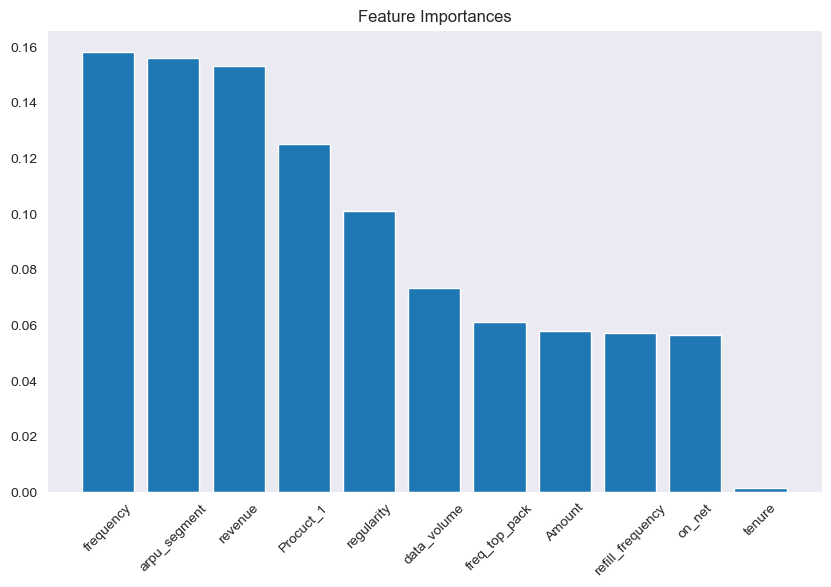

In [10]:
# Access feature importances
importances = model_rf.feature_importances_

# Get the indices that would sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()


In [11]:
model_xgb = xgb.XGBClassifier(
    learning_rate = 0.1,
    max_dephth = 5,
    n_estimators = 200,
    objective='binary:logistic',  
    eval_metric='logloss',        
    random_state=0
)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)


In [12]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.9831511314683409
Confusion Matrix:
[[189864   1310]
 [  5120 185334]]
___________________________
F1 Score: 0.9829487295079793


Feature ranking:
frequency: 0.531160295009613
arpu_segment: 0.01870591752231121
revenue: 0.006575202103704214
Procuct_1: 0.1607528030872345
regularity: 0.09073647111654282
data_volume: 0.04488357901573181
freq_top_pack: 0.07599110901355743
Amount: 0.004498026333749294
refill_frequency: 0.010863722302019596
on_net: 0.05012499913573265
tenure: 0.005707853473722935


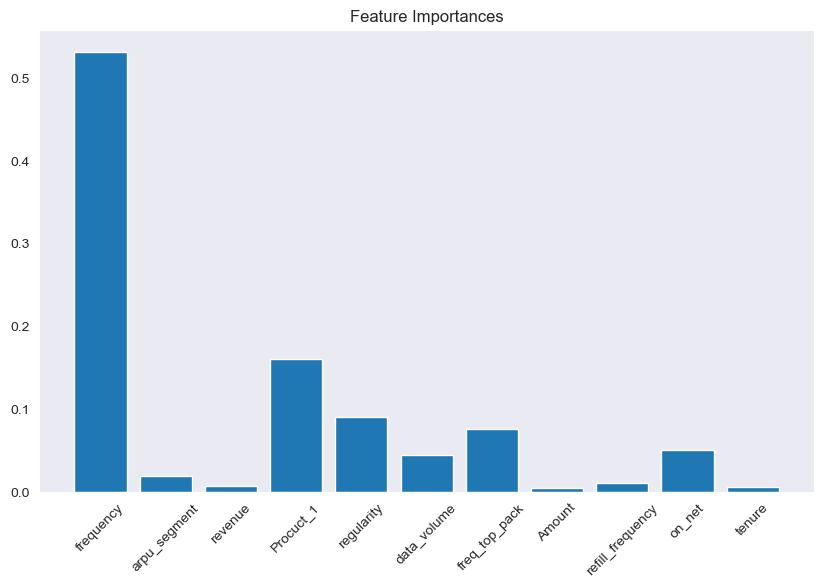

In [14]:

importances = model_xgb.feature_importances_
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()

In [18]:
test_data = pd.read_csv('Test.csv')
test_data.set_index("ID", inplace=True)
test_data

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack
ID,,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,Droidika,K > 24 month,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,NaN,NaN,NO,59,On net 200F=Unlimited _call24H,11.0
ID_04KNWHGV5783,Luminous,K > 24 month,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,84.0,NaN,NaN,NO,49,All-net 500F=2000F;5d,12.0
ID_CXS07G6VLB2U,Astral,K > 24 month,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,NaN,NaN,NO,13,Jokko_Daily,6.0
ID_N3NFJJVHS25K,Eclipsara,K > 24 month,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,NaN,NaN,NaN,NO,53,All-net 500F=2000F;5d,13.0
ID_R36J4ROT93E9,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,Stellaris,K > 24 month,4273.50,19.0,4487.18,1495.73,20.0,NaN,60.0,208.0,80.0,NaN,NaN,NO,54,All-net 500F=2000F;5d,20.0
ID_XGDT520DFBLP,NaN,K > 24 month,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,NaN,NaN,NO,59,"Data: 200 F=100MB,24H",33.0
ID_9RDB792PB5Q4,Mandalore,K > 24 month,NaN,NaN,42.31,14.10,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NO,43,NaN,NaN


In [19]:
X_train

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
1660004,0.159247,-0.659553,-0.688362,-0.670659,-0.670667,-0.767897,-0.364075,-0.369234,-0.494992,-1.282413,-0.601692
638270,0.159247,-0.659553,-0.688362,-0.670659,-0.670667,-0.767897,-0.364075,-0.369234,-0.494992,-1.282413,-0.601692
1077606,0.159247,3.285305,-0.814218,-0.582621,-0.582366,1.113456,-0.386605,-0.279089,-0.583859,-0.125183,-0.093663
50895,0.159247,-0.394798,-0.059078,-0.388377,-0.388121,-0.140780,-0.165530,-0.311541,0.050908,0.754311,-0.432349
1487176,0.159247,-0.659553,-0.688362,-0.670659,-0.670667,-0.767897,-0.364075,-0.369234,-0.494992,-1.236124,-0.601692
...,...,...,...,...,...,...,...,...,...,...,...
152315,0.159247,-0.791928,-0.814218,-0.759205,-0.758950,-0.872417,-0.308595,0.979342,-0.215695,-0.495497,-0.771035
963395,0.159247,0.558322,2.080486,0.545985,0.546236,1.636054,-0.308595,3.521446,0.368291,1.402360,0.583708
117952,0.159247,-0.103564,-0.184935,-0.093561,-0.093305,-0.036260,0.177486,-0.354811,-0.583859,0.569155,-0.601692
1484405,-6.662937,-0.659553,-0.688362,-0.734125,-0.734391,-0.767897,-0.384915,-0.372840,-0.507687,-1.097256,-0.601692


In [20]:
test_df = test_data.iloc[:,1:19].copy().drop(columns=['mrg','Procuct_2', 'zone1', 'zone2','top_pack'])
#test_df = raw_data.iloc[:,2:19].copy().drop(columns =['top_pack','mrg'])
tenuremap = {
    'K > 24 month': 24,
    'I 18-21 month': (18 + 21) / 2,
    'H 15-18 month': (15 + 18) / 2,
    'G 12-15 month': (12 + 15) / 2,
    'J 21-24 month': (21 + 24) / 2,
    'F 9-12 month': (9 + 12) / 2,
    'E 6-9 month': (6 + 9) / 2,
    'D 3-6 month': (3 + 6) / 2,
}
test_df['tenure'] = test_df['tenure'].map(tenuremap)
test_df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,19.0,4487.18,1495.73,20.0,NaN,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,NaN,NaN,42.31,14.10,1.0,0.0,1.0,1.0,43,NaN


In [21]:
test_df[test_df['frequency'].notnull()] = test_df[test_df['frequency'].notnull()].fillna(test_df['frequency'].median())
test_df[test_df['Procuct_1'].notnull()] = test_df[test_df['Procuct_1'].notnull()].fillna(test_df['Procuct_1'].median())
test_df[test_df['data_volume'].notnull()] = test_df[test_df['data_volume'].notnull()].fillna(test_df['data_volume'].median())
test_df[test_df['on_net'].notnull()] = test_df[test_df['on_net'].notnull()].fillna(test_df['on_net'].median())
test_df[test_df['frequency'].notnull()] = test_df[test_df['frequency'].notnull()].fillna(test_df['frequency'].median())
test_df[test_df['freq_top_pack'].notnull()] = test_df[test_df['freq_top_pack'].notnull()].fillna(test_df['freq_top_pack'].median())
fill_median2 = test_df.groupby('regularity')
test_df = test_df.fillna(fill_median2.transform('median'))
test_df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,14.0,2991.45,997.01,17.0,9.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,14.00,9.0,14.00,14.00,6.0,9.0,9.0,9.0,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,19.0,4487.18,1495.73,20.0,9.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,9.00,9.0,42.31,14.10,1.0,0.0,1.0,1.0,43,9.0


In [25]:
scaler = StandardScaler()
test_scaled = pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns,index=test_df.index)
test_scaled

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,,,,
ID_LZ8K373W7EWV,0.204069,0.165446,0.511142,0.152823,0.150654,0.435283,-0.194419,0.093471,-0.264373,1.387151,0.194806
ID_04KNWHGV5783,0.204069,0.531368,0.328018,0.512306,0.510472,0.435283,-0.194534,-0.115288,0.248651,0.938501,0.300380
ID_CXS07G6VLB2U,0.204069,0.006348,-0.221355,-0.005469,-0.007859,-0.280483,-0.145540,-0.188636,0.329004,-0.676641,-0.333063
ID_N3NFJJVHS25K,0.204069,0.372270,0.144893,0.434023,0.432393,0.117165,-0.195566,-0.064509,0.749313,1.117961,0.405953
ID_R36J4ROT93E9,0.204069,-0.577102,-0.129793,-0.578557,-0.571458,-0.439543,-0.194534,-0.242237,-0.313821,-1.215022,-0.016342
...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,0.204069,1.008660,0.785829,1.060304,1.059378,0.673872,-0.194534,-0.170299,0.916201,1.162826,1.144970
ID_XGDT520DFBLP,0.204069,1.987111,2.800197,2.023211,2.023596,2.343994,0.609782,-0.106825,1.219070,1.387151,2.517429
ID_9RDB792PB5Q4,0.204069,-0.578963,-0.129793,-0.568185,-0.571348,-0.837191,-0.195566,-0.253521,-0.363269,0.669310,-0.016342


In [26]:
final_pred = model_rf.predict(test_scaled)
final_pred
data = list(zip(test_scaled.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
print(result_df)
result_df.to_csv('Submission2.1.csv',index=False)

                     ID  Predictions
0       ID_LZ8K373W7EWV            0
1       ID_04KNWHGV5783            0
2       ID_CXS07G6VLB2U            1
3       ID_N3NFJJVHS25K            0
4       ID_R36J4ROT93E9            0
...                 ...          ...
380122  ID_MGZSA4ICBD9O            0
380123  ID_XGDT520DFBLP            0
380124  ID_9RDB792PB5Q4            0
380125  ID_KDTJHH8L8Z13            1
380126  ID_2F6Y446GS8T3            0

[380127 rows x 2 columns]


In [28]:
final_pred2 = model_xgb.predict(X_test)
final_pred2
data2 = list(zip(test_scaled.index, final_pred))

result_df2 = pd.DataFrame(data2, columns=['ID', 'Predictions'])
print(result_df2)
result_df2.to_csv('Submission2.2.csv',index=False)

                     ID  Predictions
0       ID_LZ8K373W7EWV            0
1       ID_04KNWHGV5783            0
2       ID_CXS07G6VLB2U            1
3       ID_N3NFJJVHS25K            0
4       ID_R36J4ROT93E9            0
...                 ...          ...
380122  ID_MGZSA4ICBD9O            0
380123  ID_XGDT520DFBLP            0
380124  ID_9RDB792PB5Q4            0
380125  ID_KDTJHH8L8Z13            1
380126  ID_2F6Y446GS8T3            0

[380127 rows x 2 columns]


### The above iteration only scored 0.097 which is an improvement from the 0.0099 from the 2nd iteration but lower than the 0.566 of the first

so I will fill in the missing values in the same way that I did for cleaning the train data (groupby tenure)

The next iteration will be end-to-end changes with the way I have done in the second iteration of cleaning the test data


In [30]:
test_df2 = test_data.iloc[:,1:19].copy().drop(columns=['mrg','Procuct_2', 'zone1', 'zone2','top_pack'])
#test_df = raw_data.iloc[:,2:19].copy().drop(columns =['top_pack','mrg'])
tenuremap = {
    'K > 24 month': 24,
    'I 18-21 month': (18 + 21) / 2,
    'H 15-18 month': (15 + 18) / 2,
    'G 12-15 month': (12 + 15) / 2,
    'J 21-24 month': (21 + 24) / 2,
    'F 9-12 month': (9 + 12) / 2,
    'E 6-9 month': (6 + 9) / 2,
    'D 3-6 month': (3 + 6) / 2,
}
test_df2['tenure'] = test_df2['tenure'].map(tenuremap)
test_df2

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,19.0,4487.18,1495.73,20.0,NaN,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,NaN,NaN,42.31,14.10,1.0,0.0,1.0,1.0,43,NaN


In [31]:
fill_median1 = test_df2.groupby('tenure')
test_df2 = test_df2.fillna(fill_median1.transform('median'))
test_df2

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,59,11.0
ID_04KNWHGV5783,24.0,2991.45,14.0,2991.45,997.01,17.0,255.0,99.0,100.0,49,12.0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,13,6.0
ID_N3NFJJVHS25K,24.0,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,53,13.0
ID_R36J4ROT93E9,24.0,1282.05,7.0,1282.05,427.35,9.0,255.0,27.0,29.0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,19.0,4487.18,1495.73,20.0,255.0,60.0,208.0,54,20.0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,59,33.0
ID_9RDB792PB5Q4,24.0,1282.05,7.0,42.31,14.10,1.0,0.0,1.0,1.0,43,5.0


In [32]:
scaler = StandardScaler()
test_scaled = pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns,index=test_df.index)
test_scaled

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack
ID,,,,,,,,,,,
ID_LZ8K373W7EWV,0.204069,0.165446,0.511142,0.152823,0.150654,0.435283,-0.194419,0.093471,-0.264373,1.387151,0.194806
ID_04KNWHGV5783,0.204069,0.531368,0.328018,0.512306,0.510472,0.435283,-0.194534,-0.115288,0.248651,0.938501,0.300380
ID_CXS07G6VLB2U,0.204069,0.006348,-0.221355,-0.005469,-0.007859,-0.280483,-0.145540,-0.188636,0.329004,-0.676641,-0.333063
ID_N3NFJJVHS25K,0.204069,0.372270,0.144893,0.434023,0.432393,0.117165,-0.195566,-0.064509,0.749313,1.117961,0.405953
ID_R36J4ROT93E9,0.204069,-0.577102,-0.129793,-0.578557,-0.571458,-0.439543,-0.194534,-0.242237,-0.313821,-1.215022,-0.016342
...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,0.204069,1.008660,0.785829,1.060304,1.059378,0.673872,-0.194534,-0.170299,0.916201,1.162826,1.144970
ID_XGDT520DFBLP,0.204069,1.987111,2.800197,2.023211,2.023596,2.343994,0.609782,-0.106825,1.219070,1.387151,2.517429
ID_9RDB792PB5Q4,0.204069,-0.578963,-0.129793,-0.568185,-0.571348,-0.837191,-0.195566,-0.253521,-0.363269,0.669310,-0.016342


In [33]:
final_pred = model_rf.predict(test_scaled)
final_pred
data = list(zip(test_scaled.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
print(result_df)
result_df.to_csv('Submission2.1.csv',index=False)

                     ID  Predictions
0       ID_LZ8K373W7EWV            0
1       ID_04KNWHGV5783            0
2       ID_CXS07G6VLB2U            1
3       ID_N3NFJJVHS25K            0
4       ID_R36J4ROT93E9            0
...                 ...          ...
380122  ID_MGZSA4ICBD9O            0
380123  ID_XGDT520DFBLP            0
380124  ID_9RDB792PB5Q4            0
380125  ID_KDTJHH8L8Z13            1
380126  ID_2F6Y446GS8T3            0

[380127 rows x 2 columns]


In [34]:
final_pred2 = model_xgb.predict(X_test)
final_pred2
data2 = list(zip(test_scaled.index, final_pred))

result_df2 = pd.DataFrame(data2, columns=['ID', 'Predictions'])
print(result_df2)
result_df2.to_csv('Submission2.2.csv',index=False)

                     ID  Predictions
0       ID_LZ8K373W7EWV            0
1       ID_04KNWHGV5783            0
2       ID_CXS07G6VLB2U            1
3       ID_N3NFJJVHS25K            0
4       ID_R36J4ROT93E9            0
...                 ...          ...
380122  ID_MGZSA4ICBD9O            0
380123  ID_XGDT520DFBLP            0
380124  ID_9RDB792PB5Q4            0
380125  ID_KDTJHH8L8Z13            1
380126  ID_2F6Y446GS8T3            0

[380127 rows x 2 columns]
